# Exploratory Data Analysis of Metabolomics on Liver Tissue
## Purpose
Metabolomics was performed on liver tissue homogenate from mice that were considered sick or healthy controllers following infection. Our goal is to identify which metabolites were enriched in one population and not the other by using a more unbiased metric of clinical outcome.

First, we need to decide on the metric of clinical outcome that can be used to segregate the data
## Investigating different clinical outcome

In [61]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.colors 
from collections import defaultdict
from collections import deque
#reading in metabolomic data
metab_data = pd.read_csv("~/Desktop/sepsis_metabolomics_PCA/raw/metabolon_data_jeren_edits.csv")

#reading in clinical data 
clinic_data = pd.read_csv("~/Downloads/metabolomics_clinical_data.csv")
clinic_data = clinic_data.drop(['Comp.1 [32.27%]','Comp.2 [10.49%]','Comp.3 [6.29%]'],axis=1)
clinic_data.head()

#merging dataframes 
#metab_data.merge(clinic_data, left_on='lkey', right_on='rkey')


#clinic_data['PARAM_ANIMAL_ID']= re.sub(" ", "_", str(clinic_data['PARAM_ANIMAL_ID']))




,parent_sample_name,Group,CLIENT_IDENTIFIER,PARAM_AGE,PARAM_ANIMAL_ID,PARAM_CLIENT_SAMPLE_ID,PARAM_GENDER,PARAM_GROUP_ID,HPI Sacced,Final Temp
0,HARV-24507,EH_WT,EH1,10w,11.15.18 #2,Early healthy WT,F,EH_WT,49,36.5
1,HARV-24508,EH_WT,EH3,10w,11.15.18 #4,Early healthy WT,F,EH_WT,49,37.0
2,HARV-24509,EH_WT,EH5,8w,12.7.18 #7,Early healthy WT,M,EH_WT,60,36.1
3,HARV-24510,EH_WT,EH7,8w,12.7.18 #11,Early healthy WT,F,EH_WT,60,36.9
4,HARV-24511,EH_WT,EH9,6w,2.1.19 #6,Early healthy WT,M,EH_WT,46,35.3


In [62]:
merged_data = pd.read_csv("~/Downloads/final_merged_jeren.csv")
merged_data.head()



,Unnamed: 0,parent_sample_name,Group,CLIENT_IDENTIFIER,PARAM_AGE,PARAM_ANIMAL_ID,PARAM_CLIENT_SAMPLE_ID,PARAM_GENDER,PARAM_GROUP_ID,HPI.Sacced,...,X100001394,X100001451,X566,X100003640,X100003641,X100003210,X1004,X100000299,X100000015,year
0,1,HARV-24509,EH_WT,EH5,8w,12.7.18_#7,Early healthy WT,M,EH_WT,60,...,0.2880,1.0257,0.6015,1.1362,1.0880,0.9940,0.9168,1.2714,1.2557,2018
1,2,HARV-24510,EH_WT,EH7,8w,12.7.18_#11,Early healthy WT,F,EH_WT,60,...,1.5633,1.5438,0.8071,0.7525,0.7213,1.3981,1.0934,1.5455,0.8756,2018
2,3,HARV-24511,EH_WT,EH9,6w,2.1.19_#6,Early healthy WT,M,EH_WT,46,...,0.9881,1.0104,0.4416,1.0011,0.9842,0.6383,0.9799,1.8851,0.7286,2019
3,4,HARV-24512,EH_WT,EH11,7w,6.11.19_#7,Early healthy WT,F,EH_WT,57,...,0.8733,0.8915,0.6896,0.5123,0.6470,0.9666,0.8868,0.5241,0.6401,2019
4,5,HARV-24514,ES_WT,ES4,8w,12.7.18_#14,Early sick WT,F,ES_WT,60,...,1.1748,1.2712,0.9087,1.6988,1.2799,1.2191,1.4242,3.6886,0.3365,2018


In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [64]:
metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features
x = merged_data.loc[:, metabolites].values
# Separating out the Group
y = merged_data.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = metabolites).head()

,X100002945,X100002356,X100009062,X100020727,X100003926,X100009271,X100006374,X100008903,X100009217,X100000657,...,X100002913,X100001394,X100001451,X566,X100003640,X100003641,X100003210,X1004,X100000299,X100000015
0,-0.775438,-0.558323,-0.650191,-0.784096,-1.185705,-0.987625,-0.465027,0.816521,0.265913,-0.042247,...,-0.345345,-0.737253,0.007796,-1.119767,0.337977,-0.086738,-0.332015,-0.517328,-0.024135,0.737817
1,-0.598332,-0.479257,-0.650191,-0.784096,-1.092017,-0.934880,1.383910,-1.299356,-1.051650,-0.239717,...,0.760817,0.720940,0.782838,-0.602812,-0.608285,-0.869704,0.537965,0.169602,0.303545,-0.028945
2,-1.263155,-0.832636,-0.650191,-0.784096,-0.852976,-0.826819,-0.465027,-0.200112,-0.856850,-1.350428,...,0.054509,0.063249,-0.015092,-1.521816,0.004800,-0.308368,-1.097795,-0.271885,0.709528,-0.325483
3,0.766163,0.474833,-0.650191,-0.784096,0.080020,-0.415049,-0.465027,-1.256118,-0.525107,-0.015261,...,-0.474974,-0.068014,-0.192958,-0.898251,-1.200654,-1.028347,-0.391004,-0.634021,-0.917512,-0.504011
4,0.459594,0.205277,-0.650191,-0.696850,0.114559,-0.635674,-0.465027,-0.177966,0.469666,1.611612,...,-0.474974,0.276724,0.375047,-0.347352,1.725433,0.323002,0.152599,1.456332,2.865565,-1.116452


In [65]:
#PCA Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,16.233331,-2.375189
1,16.860422,8.804170
2,22.786636,-7.776650
3,-0.159236,-5.954853
4,-4.770076,1.571613


In [66]:
finalDf = pd.concat([principalDf, merged_data[['Group']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Group
0,16.233331,-2.375189,EH_WT
1,16.860422,8.804170,EH_WT
2,22.786636,-7.776650,EH_WT
3,-0.159236,-5.954853,EH_WT
4,-4.770076,1.571613,ES_WT


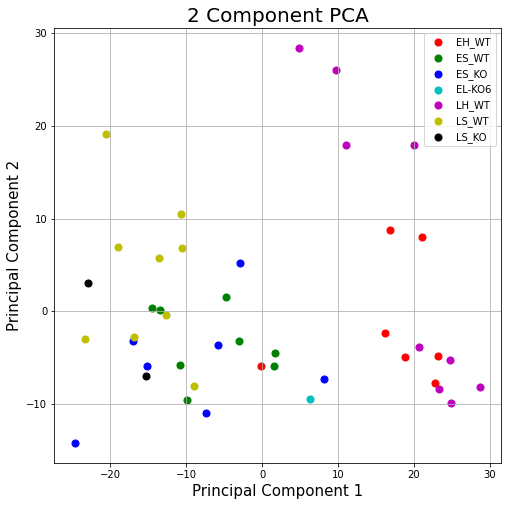

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

Groups = ['EH_WT','ES_WT','ES_KO','EL-KO6','LH_WT','LS_WT','LS_KO']
colors = ['r', 'g', 'b', 'c' , 'm', 'y', 'k']
for Group, color in zip(Groups,colors):
    indicesToKeep = finalDf['Group'] == Group
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Groups)
ax.grid()

In [68]:
finalDf = pd.concat([principalDf, merged_data[['PARAM_GENDER']], merged_data[['Group']]], axis = 1)
print(finalDf)

    principal component 1  principal component 2 PARAM_GENDER   Group
0               16.233331              -2.375189            M   EH_WT
1               16.860422               8.804170            F   EH_WT
2               22.786636              -7.776650            M   EH_WT
3               -0.159236              -5.954853            F   EH_WT
4               -4.770076               1.571613            F   ES_WT
5                1.571590              -5.934073            M   ES_WT
6              -13.522746               0.082135            F   ES_WT
7              -10.872162              -5.848061            F   ES_WT
8               -2.948191               5.167660            F   ES_KO
9               -7.449376             -10.934247            M   ES_KO
10               6.348532              -9.433209            M  EL-KO6
11               8.156425              -7.313661            M   ES_KO
12              28.735018              -8.156645            M   LH_WT
13              23.3

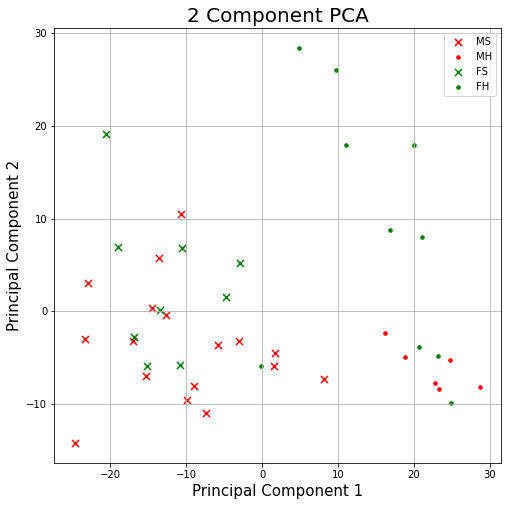

In [69]:
#double check to see proportion of sick vs healthy by sex of mice 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

PARAM_GENDERS = ['M','M','F','F']
PARAM_GROUP = ['S','H','S','H']
Groups = ['MS','MH','FS','FH']

colors = ['r', 'r','g','g']
markers = ['x','.', 'x', '.']

for i in range(len(Groups)):
    Gender = PARAM_GENDERS[i]
    Group = PARAM_GROUP[i]
    Color = colors[i]
    Marker = markers[i]
    
    indicesToKeep = (finalDf['PARAM_GENDER'] == Gender)&(finalDf['Group'].str.contains(Group))
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = Color
               , s = 50
               , marker = Marker
               , label = Groups[i])
ax.legend()
ax.grid()



In [70]:
#CATAGORIZING BY AGE
finalDf = pd.concat([principalDf, merged_data[['PARAM_AGE']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,PARAM_AGE
0,16.233331,-2.375189,8w
1,16.860422,8.804170,8w
2,22.786636,-7.776650,6w
3,-0.159236,-5.954853,7w
4,-4.770076,1.571613,8w


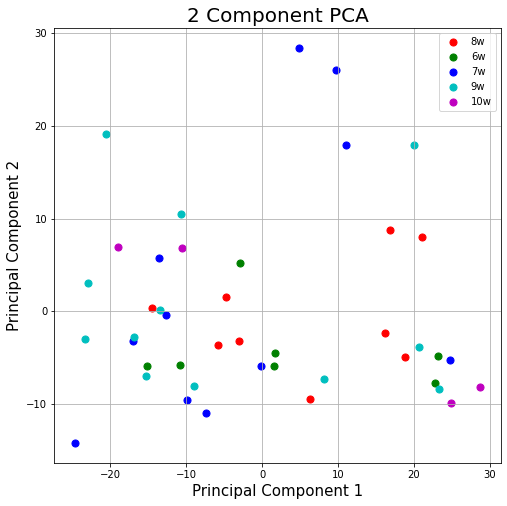

In [71]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

PARAM_AGES = ['8w',  '6w',  '7w',  '9w',  '10w']
colors = ['r', 'g', 'b', 'c' , 'm', 'y', 'k']
for PARAM_AGE, color in zip(PARAM_AGES,colors):
    indicesToKeep = finalDf['PARAM_AGE'] == PARAM_AGE
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(PARAM_AGES)
ax.grid()

In [72]:
#CATAGORIZING BY YEAR OF DATA COLLECTION
finalDf = pd.concat([principalDf, merged_data[['year']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,year
0,16.233331,-2.375189,2018
1,16.860422,8.804170,2018
2,22.786636,-7.776650,2019
3,-0.159236,-5.954853,2019
4,-4.770076,1.571613,2018


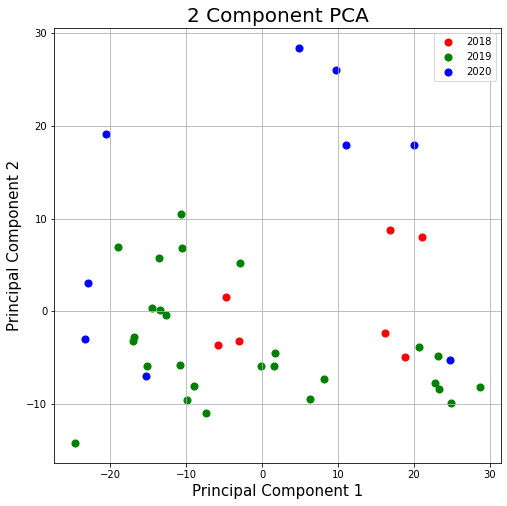

In [73]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

years = [2018, 2019, 2020]

colors = ['r', 'g', 'b']
for year, color in zip(years,colors):
    indicesToKeep = finalDf['year'] == year
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(years)
ax.grid()


In [74]:
#CATAGORIZATION BY LIVER CFU
finalDf = pd.concat([principalDf, merged_data[['Liver_CFU']]], axis = 1)
finalDf = finalDf[~finalDf.Liver_CFU.str.contains("-")]
finalDf.head()



,principal component 1,principal component 2,Liver_CFU
0,16.233331,-2.375189,651.4657981
1,16.860422,8.804170,512.3247946
2,22.786636,-7.776650,4.514672686
4,-4.770076,1.571613,205920.2059
5,1.571590,-5.934073,59040.59041


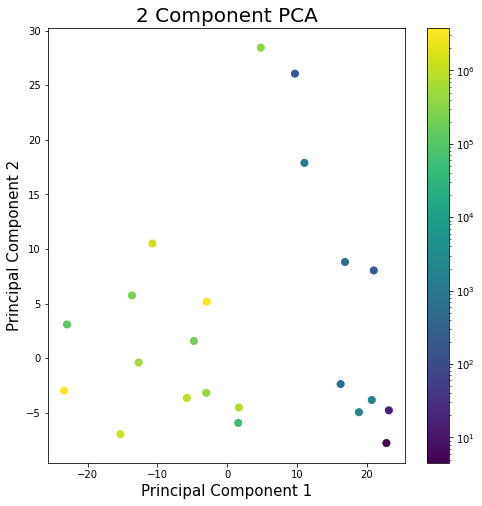

In [75]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

plt.scatter(finalDf['principal component 1']
            , finalDf['principal component 2']
            , c = finalDf['Liver_CFU'].astype(float)
            , s = 50
            , cmap = 'viridis'
            , norm= matplotlib.colors.LogNorm())
plt.colorbar()


#more purple means lower CFU 

In [76]:
finalDf['Liver_CFU'] = finalDf['Liver_CFU'].replace([0],[1])
finalDf.head()

,principal component 1,principal component 2,Liver_CFU
0,16.233331,-2.375189,651.4657981
1,16.860422,8.804170,512.3247946
2,22.786636,-7.776650,4.514672686
4,-4.770076,1.571613,205920.2059
5,1.571590,-5.934073,59040.59041


In [77]:
#fig = plt.figure(figsize = (8,8))
#ax = fig.add_subplot(1,1,1) 
#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 Component PCA', fontsize = 20)

#plt.scatter(finalDf['principal component 1']
            , finalDf['principal component 2']
            , c = finalDf['Final.Temp']
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
#plt.colorbar()

IndentationError: unexpected indent (<ipython-input-77-1f2bdd080c49>, line 8)

In [78]:
#CATAGORIZATION BY TEMPERATURE
finalDf = pd.concat([principalDf, merged_data[['Final.Temp']]], axis = 1)

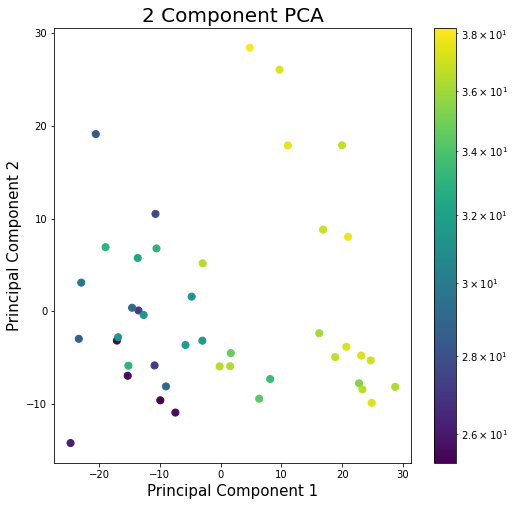

In [79]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

plt.scatter(finalDf['principal component 1']
            , finalDf['principal component 2']
            , c = finalDf['Final.Temp']
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()

In [80]:
#CATAGORIZATION BY HPI SACCED
finalDf = pd.concat([principalDf, merged_data[['HPI.Sacced','Group']]], axis = 1)
Group = list(finalDf['Group'])
indices = [i for i, x in enumerate(Group) if x == "ES_WT" or x == "LS_WT" or x == "ES_KO" or x == "LS_KO"]
sick = finalDf.iloc[indices,]

    principal component 1  principal component 2  HPI.Sacced  Group
4               -4.770076               1.571613          60  ES_WT
5                1.571590              -5.934073          46  ES_WT
6              -13.522746               0.082135          57  ES_WT
7              -10.872162              -5.848061          60  ES_WT
8               -2.948191               5.167660          46  ES_KO
9               -7.449376             -10.934247          57  ES_KO
11               8.156425              -7.313661          52  ES_KO
16             -12.672735              -0.405145          75  LS_WT
17             -13.644011               5.741088          96  LS_WT
18             -10.554409               6.775823          90  LS_WT
19              -8.998933              -8.112299          71  LS_WT
20             -20.542976              19.108544          95  LS_WT
21             -15.295720              -6.962938          86  LS_KO
25              -3.003573              -3.177134

[4, 5, 6, 7, 8, 9, 11, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 38, 39, 40, 41, 42]


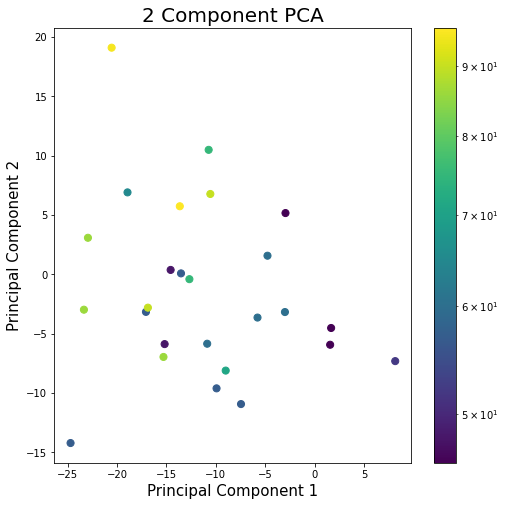

In [81]:
#HPI.Sacced
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

print(indices)
plt.scatter(sick['principal component 1']
            , sick['principal component 2']
            , c = sick['HPI.Sacced']
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()


In [82]:
#DATA WITH TREATED
merged_data = pd.read_csv("../raw/final_merged_treatments_jeren.csv")
merged_data = merged_data.drop(['Unnamed: 0'], axis = 1)
metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features
x = merged_data.loc[:, metabolites].values
# Separating out the Group
y = merged_data.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
metabss = pd.DataFrame(data = x, columns = metabolites)




In [83]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,15.328829,-4.093352
1,16.376191,7.290197
2,21.626305,-9.764607
3,-1.073095,-6.377966
4,-5.573165,0.918263


In [84]:
finalDf = pd.concat([principalDf, merged_data[['TREATMENT']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,TREATMENT
0,15.328829,-4.093352,C
1,16.376191,7.290197,C
2,21.626305,-9.764607,C
3,-1.073095,-6.377966,C
4,-5.573165,0.918263,C


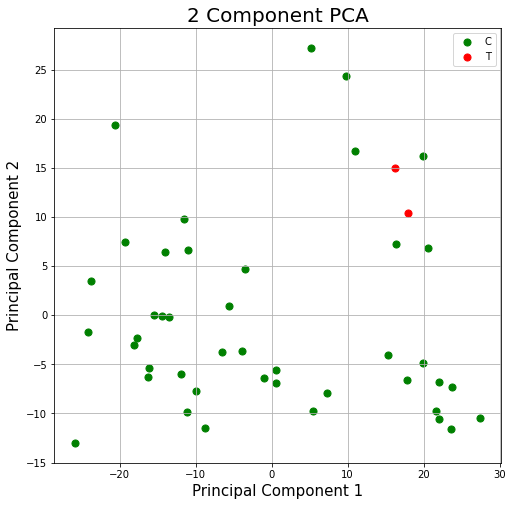

In [85]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

Treatments = ['C', 'T']
colors = ['g', 'r']
for Treatment, color in zip(Treatments,colors):
    indicesToKeep = finalDf['TREATMENT'] == Treatment
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Treatments)
ax.grid()

In [86]:
list_a = list(['1','2','3','4','5','6','6','6','33','2','6'])

indices = [x for i, x in enumerate(list_a) if x == "6" or x == "3"]
print(indices)



['3', '6', '6', '6', '6']


coefficient of determination: 0.2625619756439521
intercept: -5.070322704549696
slope: [0.17810669]


Text(0, 0.5, 'X100002913')

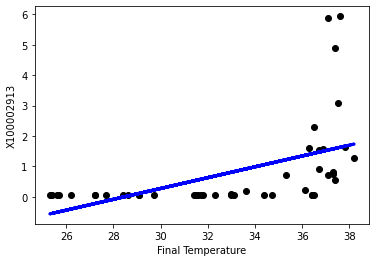

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
 
#Defining Varialbes 
x = np.array(merged_data['Final.Temp']).reshape((-1,1))
y = np.array(merged_data['X100002913'])


#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)

#plotting 
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('Final Temperature') 
plt.ylabel('X100002913')


coefficient of determination: 0.36533903199049633
intercept: 29.057743607678223
slope: [3.83407212]


Text(0, 0.5, 'X100001451')

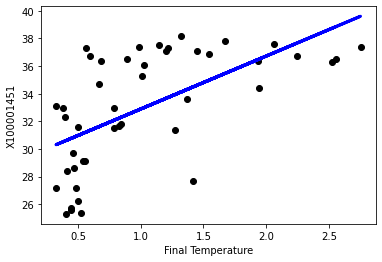

In [88]:
#Defining Varialbes 
y = np.array(merged_data['Final.Temp'])
x = np.array(merged_data['X100001451']).reshape((-1,1))

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)

#plotting 
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('Final Temperature') 
plt.ylabel('X100001451')


[[-0.58537706 -0.46385512 -0.62969002 ...  0.15283766  0.26737123
  -0.08528677]
 [-1.26133881 -0.82317814 -0.62969002 ... -0.29130113  0.67487584
  -0.37100133]
 [ 0.80197924  0.50628533 -0.62969002 ... -0.65561234 -0.95826247
  -0.54301316]
 ...
 [ 0.0293048  -0.38615508  0.26858646 ...  0.52614903 -0.46448112
  -1.1331012 ]
 [ 0.01304337 -0.45346868 -0.62969002 ...  0.51480099 -0.23540977
  -0.82056446]
 [ 0.79633053 -0.00526634 -0.18782326 ...  0.88146006 -0.78234911
  -1.1331012 ]]
(1, 917)
(917,)
(917, 1)


,metabolite,coef
0,X100002945,-0.008439
1,X100002356,-0.038631
2,X100009062,0.021130
3,X100020727,-0.002156
4,X100003926,-0.045796


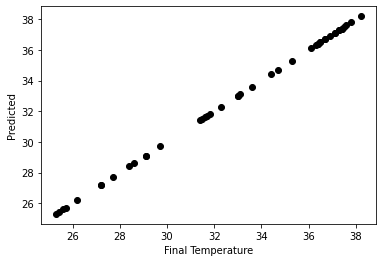

In [89]:
#Defining Varialbes 
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(metabss)
print(x[1:10])

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred,  color='black')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')

#Dataframe of Coeffs and Intercepts 
print(metabss.columns.shape)
print(np.transpose(model.coef_).shape)

linearreg_data = pd.DataFrame(data={'metabolite': metabss.columns})
linearreg_data['coef'] = np.transpose(model.coef_)
linearreg_data.head()


In [90]:
#Logistical Regression

#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report, confusion_matrix

#Defining Varialbes 
#x = np.array(merged_data['Final.Temp']).reshape((-1,1))
#y = np.array(merged_data['X566']

#Creating and Fitting Model 
#model = LogisticRegression(random_state=0)


#Results 
#r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
#y_predicted = model.predict(x)
             
#plotting 
#plt.scatter(x, y,  color='black')
#plt.plot(x, y_predicted, color='blue', linewidth=3)
#plt.xlabel('Final Temperature') 
#plt.ylabel('X566')


array([[<AxesSubplot:title={'center':'coef'}>]], dtype=object)

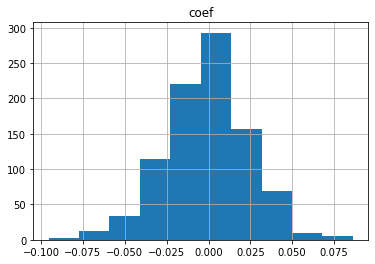

In [91]:
linearreg_data.hist()
#Look at the most positive/most negative 
#plot individual metabolites along with final temperature to see how individual metabolites relate to temperature 
#Build modeling using just extreme metabolites 


Text(0, 0.5, 'Predicted')

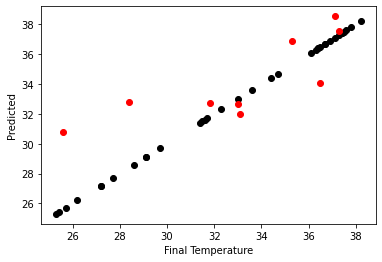

In [92]:
import numpy as np
from sklearn.model_selection import train_test_split

#split test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)

#Plot Trained
plt.scatter(y_train, y_pred_train,  color='black')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')

#Plot Test
y_pred_test = model.predict(x_test)
plt.scatter(y_test, y_pred_test,  color='red')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')

(1, 15)


Text(0, 0.5, 'Predicted')

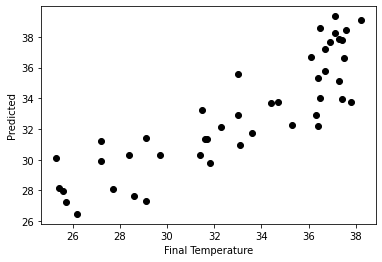

In [93]:
#Taking top 0.050 coef
high_coef =  linearreg_data[linearreg_data.coef > 0.050]
metabs_high_coef = high_coef['metabolite']
highest_metabs = metabss[metabs_high_coef]
#Taking bottom 0.60 coef 
low_coef =  linearreg_data[linearreg_data.coef < -0.060]
metabs_low_coef = low_coef['metabolite']
lowest_metabs = metabss[metabs_low_coef]

#Plotting Using Highest 
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(highest_metabs)

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred,  color='black')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')



(1, 15)


Text(0, 0.5, 'Predicted')

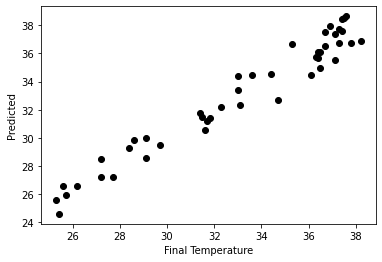

In [94]:
#Taking bottom 0.60 coef 
low_coef =  linearreg_data[linearreg_data.coef < -0.060]
metabs_low_coef = low_coef['metabolite']
lowest_metabs = metabss[metabs_low_coef]

#Plotting Using Highest 
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(lowest_metabs)

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred,  color='black')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')


(1, 30)


Text(0, 0.5, 'Predicted')

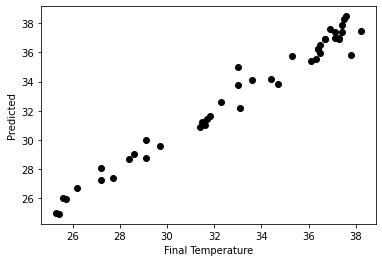

In [95]:
#Taking top and bottom
extreme_metabs = pd.concat([lowest_metabs, highest_metabs], axis=1)

#Plotting Extremes
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(extreme_metabs)

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred,  color='black')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')


coefficient of determination: 0.07927311412152094
intercept: 36.179126793184885
slope: [-2.98804882]


Text(0, 0.5, 'Final Temperature')

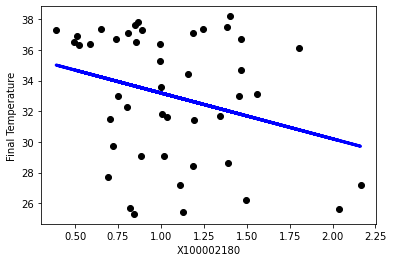

In [96]:
#Defining Varialbes 
y = np.array(merged_data['Final.Temp'])
x = np.array(merged_data['X100002180']).reshape((-1,1))

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)

#plotting 
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.xlabel('X100002180') 
plt.ylabel('Final Temperature')


/Users/jerenwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


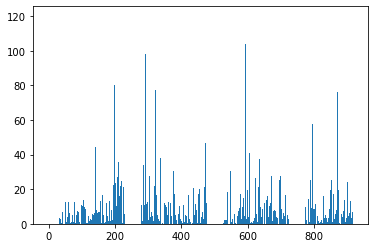

,metabolite,feature
221,X100001143,119.633808
593,X100001198,104.092524
292,X100001300,97.886932
279,X100000863,87.684567
198,X100020211,79.980822
322,X1442,77.573065
870,X100020343,75.967565
639,X1084,74.648783
4,X100003926,74.049572
8,X100009217,72.029808


In [124]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(metabss)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
#what are scores for the features
Features_data = pd.DataFrame(data={'metabolite': np.ravel(metabss.columns), 
                                   'feature': fs.scores_})
#for i in range(len(fs.scores_)):
#  Features_data['Feature'] ='Feature %d: %f' % (i, fs.scores_[i])
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

type(fs.scores_)
largest_metabs = Features_data.nlargest(20, 'feature')
largest_metabs

#array(['X100009217', 'X100001232', 'X100001694', 'X100000863',
#       'X100000706', 'X100001300', 'X100000008', 'X1442', 'X1268',
#       'X100001620', 'X100021760', 'X100001293', 'X49', 'X100002749',
 #      'X1001'], dtype='<U10')




In [ ]:
matching = []

(1, 20)


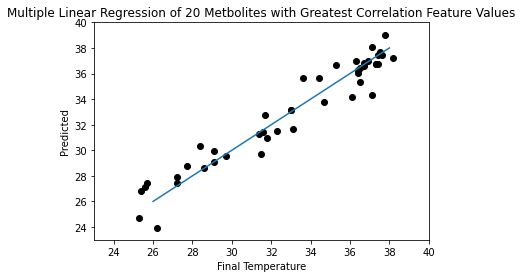

In [118]:
#Plotting Extremes
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(metabss[largest_metabs.metabolite])

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred,  color='black')
plt.xlim(23, 40)
plt.ylim(23, 40)
plt.title('Multiple Linear Regression of 20 Metbolites with Greatest Correlation Feature Values')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted')
plt.plot([26, 38], [26, 38], '-')



In [187]:
metabss[largest_metabs.metabolite]


398    X100001182
389         X1231
683    X100001231
367    X100001437
717    X100000841
46     X100009227
281    X100001193
773           X49
191         X1114
510    X100001124
600         X1200
599          X187
666    X100002132
120    X100001462
665    X100003240
124    X100001277
691          X892
556    X100006726
322         X1442
187    X100001426
Name: metabolite, dtype: object

In [134]:
#LASSO Analysis 
# Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
#Defining Variables:
y = np.array(merged_data['Final.Temp']).reshape((-1,1))
x = np.array(metabss)
#Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 1)
#Pipeline Scaling
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
#Optimize alpha-hyperparameter
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
#Fit the grid search
search.fit(X_train,y_train)
#Get best alpha
search.best_params_
#Finding important features
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
np.array(list(metabss.columns))[importance > 0]


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-8.362, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-1.132, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-5.286, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-4.304, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................... model__alpha=0.1, score=-4.165, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................... model__alpha=0.2, score=-7.719, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ... model__alpha=0.30000000000000004, score=-0.968, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] ... model__alpha=0.30000000000000004, score=-5.991, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] ... model__alpha=0.30000000000000004, score=-3.957, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV] ... model__alpha=0.30000000000000004, score=-4.773, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................... model__alpha=0.4, score=-7.244, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................... model__alpha=0.4, score=-1.347, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................... model__alpha=0.4, score=-5.971, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] .

[CV] .... model__alpha=1.8000000000000003, score=-2.333, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV] ... model__alpha=1.8000000000000003, score=-19.566, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV] .... model__alpha=1.8000000000000003, score=-5.945, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV] .... model__alpha=1.8000000000000003, score=-9.743, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] ... model__alpha=1.9000000000000001, score=-10.036, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] .... model__alpha=1.9000000000000001, score=-2.500, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] ... model__alpha=1.9000000000000001, score=-20.150, total=   0.0s
[CV] model__alpha=1.9000000000000001 .................................
[CV] .

[CV] ... model__alpha=3.4000000000000004, score=-18.738, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] ... model__alpha=3.5000000000000004, score=-15.496, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] .... model__alpha=3.5000000000000004, score=-7.798, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] ... model__alpha=3.5000000000000004, score=-32.149, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] ... model__alpha=3.5000000000000004, score=-11.131, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] ... model__alpha=3.5000000000000004, score=-19.412, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] .................. model__alpha=3.6, score=-15.859, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] .

[CV] .................. model__alpha=5.7, score=-16.708, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] ................... model__alpha=5.7, score=-9.743, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] .................. model__alpha=5.7, score=-32.149, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] .................. model__alpha=5.7, score=-13.857, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] .................. model__alpha=5.7, score=-20.448, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] .................. model__alpha=5.8, score=-16.708, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] ................... model__alpha=5.8, score=-9.743, total=   0.0s
[CV] model__alpha=5.8 ................................................
[CV] .

[CV] .................. model__alpha=7.9, score=-16.708, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ................... model__alpha=7.9, score=-9.743, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] .................. model__alpha=7.9, score=-32.149, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] .................. model__alpha=7.9, score=-13.857, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] .................. model__alpha=7.9, score=-20.448, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] .................. model__alpha=8.0, score=-16.708, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................... model__alpha=8.0, score=-9.743, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.5s finished


array(['X100009217', 'X100001232', 'X100001694', 'X100000863',
       'X100000706', 'X100001300', 'X100000008', 'X1442', 'X1268',
       'X100001620', 'X100021760', 'X100001293', 'X49', 'X100002749',
       'X1001'], dtype='<U10')

In [148]:
#Largest from Feature Selection
largest_metabs['metabolite'] = largest_metabs['metabolite'].astype(str)
largest_metabs['metabolite'] = largest_metabs['metabolite'].str[1:]
largest_metabs.rename(columns={'metabolite':'CHEMICAL ID'}, inplace=True)

names = pd.read_csv("~/Desktop/sepsis_metabolomics_PCA/raw/Biochemical_names.csv")
names['CHEMICAL ID']=names['CHEMICAL ID'].astype(str)
names.head()
Features_ID = pd.merge(largest_metabs, names)
Features_ID.rename(columns={'feature':'feature_corrVal'}, inplace=True)
feature_table = Features_ID[['BIOCHEMICAL','CHEMICAL ID','feature_corrVal']]
top_features = feature_table.head(20)



,BIOCHEMICAL,CHEMICAL ID,feature_corrVal
0,3-hydroxysuberate,100001143,119.633808
1,myristoleate (14:1n5),100001198,104.092524
2,alpha-hydroxyisovalerate,100001300,97.886932
3,adipate,100000863,87.684567
4,3-hydroxybutyroylglycine,100020211,79.980822
5,beta-hydroxyisovalerate,1442,77.573065
6,tetradecadienoate (14:2)*,100020343,75.967565
7,N-acetylvaline,1084,74.648783
8,(R)-3-hydroxybutyrylcarnitine,100003926,74.049572
9,"1,2-dilinoleoyl-GPE (18:2/18:2)*",100009217,72.029808


In [133]:
#Largest from Lasso
from pandas import DataFrame
lasso_largest = list(lasso_largest)
df = DataFrame(lasso_largest, columns = ['CHEMICAL ID'])
df['CHEMICAL ID'] = df['CHEMICAL ID'].str[1:]
Lasso_ID = pd.merge(df, names)
Lasso_table = Lasso_ID[['BIOCHEMICAL','CHEMICAL ID']]
top_lasso = Lasso_table.head(50)

,BIOCHEMICAL,CHEMICAL ID
0,"1,2-dilinoleoyl-GPE (18:2/18:2)*",100009217
1,5-dodecenoate (12:1n7),100001232
2,2'-AMP,100001694
3,adipate,100000863
4,alpha-hydroxyisocaproate,100000706
5,alpha-hydroxyisovalerate,100001300
6,benzoate,100000008
7,beta-hydroxyisovalerate,1442
8,gamma-glutamylleucine,1268
9,glycerophosphoethanolamine,100001620


In [147]:
#Lasso Features Heat Map
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")
metab_def.head(15)
merged_lasso = pd.merge(metab_def, top_lasso, on='BIOCHEMICAL', how='right')
merged_lasso

,PATHWAY SORTORDER,BIOCHEMICAL,SUPER PATHWAY,SUB PATHWAY,COMP ID,PLATFORM,CHEMICAL ID_x,RI,MASS,HMDB,PUBCHEM,CHEMICAL ID_y
0,2452,"1,2-dilinoleoyl-GPE (18:2/18:2)*",Lipid,Phosphatidylethanolamine (PE),53174,LC/MS Pos Late,100009217,2150.0,740.5225,HMDB0009093,9546812,100009217
1,1504,5-dodecenoate (12:1n7),Lipid,Medium Chain Fatty Acid,33968,LC/MS Neg,100001232,5224.0,197.1547,HMDB0000529,5312378,100001232
2,4139,2'-AMP,Nucleotide,"Purine Metabolism, Adenine containing",36815,LC/MS Neg,100001694,1497.7,346.0558,HMDB0011617,94136,100001694
3,1665,adipate,Lipid,"Fatty Acid, Dicarboxylate",21134,LC/MS Polar,100000863,3000.0,145.0506,HMDB0000448,196,100000863
4,347,alpha-hydroxyisocaproate,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",22132,LC/MS Neg,100000706,1840.0,131.0714,"HMDB0000665,HMDB0000624,HMDB00746",92779;83697;439960,100000706
5,424,alpha-hydroxyisovalerate,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",46537,LC/MS Polar,100001300,1052.0,117.0557,HMDB0000407,99823,100001300
6,4473,benzoate,Xenobiotics,Benzoate Metabolism,15778,LC/MS Neg,100000008,1750.0,121.0295,HMDB0001870,243,100000008
7,363,beta-hydroxyisovalerate,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",12129,LC/MS Polar,1442,1149.8,117.0557,HMDB0000754,69362,1442
8,639,gamma-glutamylleucine,Peptide,Gamma-glutamyl Amino Acid,18369,LC/MS Pos Early,1268,2991.0,261.1445,HMDB0011171,151023,1268
9,2240,glycerophosphoethanolamine,Lipid,Phospholipid Metabolism,37455,LC/MS Polar,100001620,3075.0,214.0486,HMDB0000114,123874,100001620


In [144]:
merged_lasso['SUB PATHWAY'].value_counts()

Leucine, Isoleucine and Valine Metabolism           3
Urea cycle; Arginine and Proline Metabolism         1
Phospholipid Metabolism                             1
Histidine Metabolism                                1
Lysine Metabolism                                   1
Polyamine Metabolism                                1
Methionine, Cysteine, SAM and Taurine Metabolism    1
Phosphatidylethanolamine (PE)                       1
Medium Chain Fatty Acid                             1
Gamma-glutamyl Amino Acid                           1
Benzoate Metabolism                                 1
Purine Metabolism, Adenine containing               1
Fatty Acid, Dicarboxylate                           1
Name: SUB PATHWAY, dtype: int64

In [153]:
#Features Selection Heat Map
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")
merged_feature = pd.merge(metab_def, top_features, on='BIOCHEMICAL', how='right')
merged_feature.loc[merged_feature['SUB PATHWAY'] == 'Leucine, Isoleucine and Valine Metabolism']
#alpha-hydroxyisovalerate and 2-hydroxy-3-methylvalerate are up stream in the BCAA pathway, but the others are unknown 

,PATHWAY SORTORDER,BIOCHEMICAL,SUPER PATHWAY,SUB PATHWAY,COMP ID,PLATFORM,CHEMICAL ID_x,RI,MASS,HMDB,PUBCHEM,CHEMICAL ID_y,feature_corrVal
2,424,alpha-hydroxyisovalerate,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",46537,LC/MS Polar,100001300,1052.0,117.0557,HMDB0000407,99823,100001300,97.886932
5,363,beta-hydroxyisovalerate,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",12129,LC/MS Polar,1442,1149.8,117.0557,HMDB0000754,69362,1442,77.573065
7,417,N-acetylvaline,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",1591,LC/MS Neg,1084,1704.0,158.0823,HMDB0011757,66789,1084,74.648783
12,395,2-hydroxy-3-methylvalerate,Amino Acid,"Leucine, Isoleucine and Valine Metabolism",36746,LC/MS Neg,100001541,1800.0,131.0714,HMDB0000317,164623,100001541,71.526030


In [149]:
merged_feature['SUB PATHWAY'].value_counts()

Leucine, Isoleucine and Valine Metabolism            4
Long Chain Polyunsaturated Fatty Acid (n3 and n6)    2
Fatty Acid, Monohydroxy                              2
Fatty Acid, Dicarboxylate                            2
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)      1
Medium Chain Fatty Acid                              1
Mevalonate Metabolism                                1
Long Chain Monounsaturated Fatty Acid                1
Fatty Acid, Dihydroxy                                1
Phosphatidylethanolamine (PE)                        1
Methionine, Cysteine, SAM and Taurine Metabolism     1
Fatty Acid Metabolism (Acyl Glycine)                 1
Folate Metabolism                                    1
Glycine, Serine and Threonine Metabolism             1
Name: SUB PATHWAY, dtype: int64

In [45]:
#Cross-validation
#from sklearn import svm

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)
#clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
#clf.score(X_test, y_test)
#from sklearn.model_selection import cross_val_score
#    clf = svm.SVC(kernel='linear', C=1, random_state=42)
#    scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
    

<ipython-input-139-06c07fa2494c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_CFU['Liver_CFU'] = df_CFU['Liver_CFU'].astype(float)


Text(0, 0.5, 'Predicted')

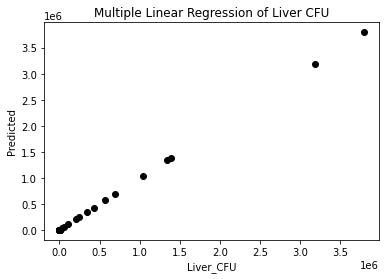

In [139]:
merged_data = pd.read_csv("../raw/final_merged_treatments_jeren.csv")
merged_data = merged_data.drop(['Unnamed: 0'], axis = 1)
df_CFU = merged_data[~merged_data['Liver_CFU'].isin(['-'])]
df_CFU['Liver_CFU'] = df_CFU['Liver_CFU'].astype(float)
# Separating out the features
x = df_CFU.loc[:, metabolites].values
# Separating out the Group
y = df_CFU.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
metabss = pd.DataFrame(data = x, columns = metabolites)

#Defining variables 
y = np.array(df_CFU['Liver_CFU']).reshape((-1,1))
x = np.array(metabss)

#Creating and Fitting Model
model = LinearRegression()
model.fit(x, y)

#Model summary function 
#r_sq = model.score(x, y)
#print('coefficient of determination:', r_sq)
#print(model.intercept_.shape)
#print(model.coef_.shape)
y_pred = model.predict(x)

#plotting 
plt.scatter(y, y_pred, color='black')
#plt.xlim(23, 40)
#plt.ylim(23, 40)
plt.title('Multiple Linear Regression of Liver CFU')
plt.xlabel('Liver_CFU') 
plt.ylabel('Predicted_Liver_CFU')


In [183]:
metabss.shape

(24, 917)

In [174]:
#LASSO Analysis 
# Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
#Defining Variables:
y = np.array(df_CFU['Liver_CFU']).reshape((-1,1))
x = np.array(metabss)
#Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 1)
#Pipeline Scaling
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
#Optimize alpha-hyperparameter
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )
#Fit the grid search
search.fit(X_train,y_train)
#Get best alpha
search.best_params_
#Finding important features
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
lasso_largest = np.array(metabss.columns)[importance > 0]
lasso_largest

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-2633987414476.729, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-1393773360964.165, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-1548683942375.736, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-2988227747091.996, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ....... model__alpha=0.1, score=-3995580652289.784, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ....... model__alpha=0.2, score=-2633988437814.430, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ....... mo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  model__alpha=1.2000000000000002, score=-2633960785325.271, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-1393671481636.961, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-1548767789604.899, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-2988170573906.482, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-3995615238055.954, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-2633954319997.217, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-1393665502492.446, total=   0.0s
[CV] model__alpha=1.3

[CV] ....... model__alpha=3.6, score=-2987958243631.238, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ....... model__alpha=3.6, score=-3995695066078.741, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ....... model__alpha=3.7, score=-2633875079938.089, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ....... model__alpha=3.7, score=-1393439395039.694, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ....... model__alpha=3.7, score=-1548943974130.007, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ....... model__alpha=3.7, score=-2987949400873.212, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ....... model__alpha=3.7, score=-3995697224612.925, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  

[CV] ....... model__alpha=4.8, score=-1393313603358.300, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] ....... model__alpha=4.8, score=-1549020540305.766, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] ....... model__alpha=4.8, score=-2987836691912.627, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] ....... model__alpha=4.8, score=-3995677200256.190, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ....... model__alpha=4.9, score=-2633827634045.005, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ....... model__alpha=4.9, score=-1393303934484.062, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] ....... model__alpha=4.9, score=-1549028132252.333, total=   0.0s
[CV] model__alpha=4.9 ................................................
[CV] .

[CV] ....... model__alpha=6.9, score=-1549167021536.466, total=   0.0s
[CV] model__alpha=6.9 ................................................
[CV] ....... model__alpha=6.9, score=-2987636103232.496, total=   0.0s
[CV] model__alpha=6.9 ................................................
[CV] ....... model__alpha=6.9, score=-3995648582404.180, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ....... model__alpha=7.0, score=-2633724310697.487, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ....... model__alpha=7.0, score=-1393150537912.141, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ....... model__alpha=7.0, score=-1549174399638.149, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] ....... model__alpha=7.0, score=-2987626748332.281, total=   0.0s
[CV] model__alpha=7.0 ................................................
[CV] .

[CV] ....... model__alpha=9.2, score=-2633607016781.233, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ....... model__alpha=9.2, score=-1392987145474.476, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ....... model__alpha=9.2, score=-1549354497414.281, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ....... model__alpha=9.2, score=-2987379964664.500, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ....... model__alpha=9.2, score=-3995719855230.449, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ....... model__alpha=9.3, score=-2633602715576.830, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ....... model__alpha=9.3, score=-1392982849528.148, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    1.8s finished


array(['X100002945', 'X100002356', 'X100009062', 'X100020727',
       'X100003926', 'X100009271', 'X100006374', 'X100008903',
       'X100009217', 'X100000657', 'X100009204', 'X100000580',
       'X100005372', 'X100009002', 'X100009069', 'X100009005',
       'X100009162', 'X100003000', 'X100008999', 'X100009225',
       'X100003001', 'X100004442', 'X100001551', 'X100001571',
       'X100001654', 'X100001433', 'X100022036', 'X100020427',
       'X100020425', 'X100020419', 'X100020421', 'X100020423',
       'X100006121', 'X100001483', 'X100001481', 'X100009403',
       'X100020769', 'X100002873', 'X100005350', 'X100020690',
       'X100001435', 'X100009131', 'X100009222', 'X100009343',
       'X100001395', 'X100001570', 'X100009227', 'X100001778',
       'X100004606', 'X100001040', 'X100020746', 'X100001208',
       'X100002910', 'X100000715', 'X100001204', 'X100001051', 'X55',
       'X100009139', 'X100000672', 'X100009219', 'X100010951',
       'X100009130', 'X100009220', 'X100009078',

In [176]:
#Largest from Lasso for CFU
from pandas import DataFrame
lasso_largest = list(lasso_largest)
df = DataFrame(lasso_largest, columns = ['CHEMICAL ID'])
df['CHEMICAL ID'] = df['CHEMICAL ID'].str[1:]
Lasso_ID = pd.merge(df, names)
Lasso_table = Lasso_ID[['BIOCHEMICAL','CHEMICAL ID']]
merged_lasso = Lasso_table.head(20)
merged_lasso

,BIOCHEMICAL,CHEMICAL ID
0,(14 or 15)-methylpalmitate (a17:0 or i17:0),100002945
1,(16 or 17)-methylstearate (a19:0 or i19:0),100002356
2,(3'-5')-adenylylcytidine,100009062
3,(3'-5')-cytidylylcytidine*,100020727
4,(R)-3-hydroxybutyrylcarnitine,100003926
5,(S)-3-hydroxybutyrylcarnitine,100009271
6,"1,2,3-benzenetriol sulfate (2)",100006374
7,"1,2-dilinoleoyl-GPC (18:2/18:2)",100008903
8,"1,2-dilinoleoyl-GPE (18:2/18:2)*",100009217
9,"1,2-dipalmitoyl-GPC (16:0/16:0)",100000657


In [177]:
lasso_largest

['X100002945',
 'X100002356',
 'X100009062',
 'X100020727',
 'X100003926',
 'X100009271',
 'X100006374',
 'X100008903',
 'X100009217',
 'X100000657',
 'X100009204',
 'X100000580',
 'X100005372',
 'X100009002',
 'X100009069',
 'X100009005',
 'X100009162',
 'X100003000',
 'X100008999',
 'X100009225',
 'X100003001',
 'X100004442',
 'X100001551',
 'X100001571',
 'X100001654',
 'X100001433',
 'X100022036',
 'X100020427',
 'X100020425',
 'X100020419',
 'X100020421',
 'X100020423',
 'X100006121',
 'X100001483',
 'X100001481',
 'X100009403',
 'X100020769',
 'X100002873',
 'X100005350',
 'X100020690',
 'X100001435',
 'X100009131',
 'X100009222',
 'X100009343',
 'X100001395',
 'X100001570',
 'X100009227',
 'X100001778',
 'X100004606',
 'X100001040',
 'X100020746',
 'X100001208',
 'X100002910',
 'X100000715',
 'X100001204',
 'X100001051',
 'X55',
 'X100009139',
 'X100000672',
 'X100009219',
 'X100010951',
 'X100009130',
 'X100009220',
 'X100009078',
 'X100001272',
 'X100001569',
 'X100005716',
 '

In [185]:
#Lasso Features Heat Map
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")
metab_def.head()
merged_lasso = pd.merge(metab_def, Lasso_table, on='BIOCHEMICAL', how='right')
merged_lasso['SUB PATHWAY'].value_counts().loc[lambda x : x>2]


Lysophospholipid                                                32
Phosphatidylcholine (PC)                                        20
Monoacylglycerol                                                19
Fatty Acid, Monohydroxy                                         17
Food Component/Plant                                            16
Leucine, Isoleucine and Valine Metabolism                       15
Phosphatidylethanolamine (PE)                                   14
Fatty Acid, Dicarboxylate                                       11
Purine Metabolism, Adenine containing                           11
Pyrimidine Metabolism, Cytidine containing                      10
Long Chain Polyunsaturated Fatty Acid (n3 and n6)               10
Histidine Metabolism                                            10
Benzoate Metabolism                                              9
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)                  9
Chemical                                                      

/Users/jerenwei/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


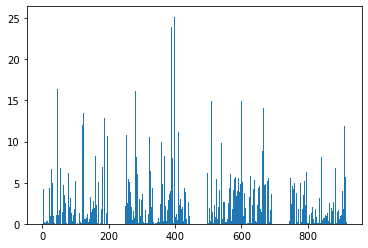

,metabolite,feature,Feature
398,X100001182,25.189173,Feature 916: 0.179351
389,X1231,23.964402,Feature 916: 0.179351
683,X100001231,19.965593,Feature 916: 0.179351
367,X100001437,17.121833,Feature 916: 0.179351
717,X100000841,16.575898,Feature 916: 0.179351
46,X100009227,16.446309,Feature 916: 0.179351
281,X100001193,16.202950,Feature 916: 0.179351
773,X49,15.472539,Feature 916: 0.179351
191,X1114,15.045437,Feature 916: 0.179351
510,X100001124,14.950234,Feature 916: 0.179351


In [160]:
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
    fs.fit(X_train, y_train)
# transform train input data
    X_train_fs = fs.transform(X_train)
# transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
y = np.array(df_CFU['Liver_CFU']).reshape((-1,1))
x = np.array(metabss)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
#what are scores for the features
Features_data = pd.DataFrame(data={'metabolite': np.ravel(metabss.columns), 
                                   'feature': fs.scores_})
for i in range(len(fs.scores_)):
    Features_data['Feature'] ='Feature %d: %f' % (i, fs.scores_[i])
#plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

largest_metabs_CFU = Features_data.nlargest(20, 'feature')
largest_metabs_CFU


In [161]:
#Largest from Feature Selection
largest_metabs_CFU['metabolite'] = largest_metabs_CFU['metabolite'].astype(str)
largest_metabs_CFU['metabolite'] = largest_metabs_CFU['metabolite'].str[1:]
largest_metabs_CFU.rename(columns={'metabolite':'CHEMICAL ID'}, inplace=True)

names = pd.read_csv("~/Desktop/sepsis_metabolomics_PCA/raw/Biochemical_names.csv")
names['CHEMICAL ID']=names['CHEMICAL ID'].astype(str)
names.head()
Features_ID = pd.merge(largest_metabs_CFU, names)
Features_ID.rename(columns={'feature':'feature_corrVal'}, inplace=True)
feature_table_CFU = Features_ID[['BIOCHEMICAL','CHEMICAL ID','feature_corrVal']]
feature_table_CFU

,BIOCHEMICAL,CHEMICAL ID,feature_corrVal
0,docosadienoate (22:2n6),100001182,25.189173
1,dihomolinoleate (20:2n6),1231,23.964402
2,nervonate (24:1n9)*,100001231,19.965593
3,cysteine-glutathione disulfide,100001437,17.121833
4,oxalate (ethanedioate),100000841,16.575898
5,1-linoleoyl-GPG (18:2)*,100009227,16.446309
6,adrenate (22:4n6),100001193,16.202950
7,putrescine,49,15.472539
8,3-aminoisobutyrate,1114,15.045437
9,histidine methyl ester,100001124,14.950234


In [163]:
#Features Selection CFU
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")
merged_features = pd.merge(metab_def, feature_table_CFU, on='BIOCHEMICAL', how='right')
merged_features


,PATHWAY SORTORDER,BIOCHEMICAL,SUPER PATHWAY,SUB PATHWAY,COMP ID,PLATFORM,CHEMICAL ID_x,RI,MASS,HMDB,PUBCHEM,CHEMICAL ID_y,feature_corrVal
0,1577,docosadienoate (22:2n6),Lipid,Long Chain Polyunsaturated Fatty Acid (n3 and n6),32415,LC/MS Neg,100001182,6034.0,335.2956,HMDB0061714,5282807,100001182,25.189173
1,1570,dihomolinoleate (20:2n6),Lipid,Long Chain Polyunsaturated Fatty Acid (n3 and n6),17805,LC/MS Neg,1231,5730.0,307.2643,HMDB0005060,6439848,1231,23.964402
2,1549,nervonate (24:1n9)*,Lipid,Long Chain Monounsaturated Fatty Acid,52674,LC/MS Neg,100001231,6804.0,365.3425,HMDB0002368,5281120,100001231,19.965593
3,573,cysteine-glutathione disulfide,Amino Acid,Glutathione Metabolism,35159,LC/MS Pos Early,100001437,2465.0,427.0952,HMDB0000656,3080690,100001437,17.121833
4,4353,oxalate (ethanedioate),Cofactors and Vitamins,Ascorbate and Aldarate Metabolism,20694,LC/MS Neg,100000841,603.0,88.9880,HMDB0002329,971,100000841,16.575898
5,2715,1-linoleoyl-GPG (18:2)*,Lipid,Lysophospholipid,54885,LC/MS Neg,100009227,5516.0,507.2728,NaN,NaN,100009227,16.446309
6,1575,adrenate (22:4n6),Lipid,Long Chain Polyunsaturated Fatty Acid (n3 and n6),32980,LC/MS Neg,100001193,5678.0,331.2643,HMDB0002226,5497181;5282844,100001193,16.202950
7,537,putrescine,Amino Acid,Polyamine Metabolism,1408,LC/MS Pos Early,49,3027.0,89.1073,HMDB0001414,1045,49,15.472539
8,4281,3-aminoisobutyrate,Nucleotide,"Pyrimidine Metabolism, Thymine containing",1566,LC/MS Pos Early,1114,2190.0,104.0706,HMDB0002166,64956,1114,15.045437
9,102,histidine methyl ester,Amino Acid,Histidine Metabolism,32493,LC/MS Pos Early,100001124,3080.0,170.0924,NaN,92893,100001124,14.950234


In [164]:
merged_feature['SUB PATHWAY'].value_counts()

Polyamine Metabolism                                 4
Long Chain Polyunsaturated Fatty Acid (n3 and n6)    3
Long Chain Monounsaturated Fatty Acid                2
Lysophospholipid                                     2
Endocannabinoid                                      2
Ascorbate and Aldarate Metabolism                    1
Histidine Metabolism                                 1
Long Chain Saturated Fatty Acid                      1
Pyrimidine Metabolism, Thymine containing            1
Pyrimidine Metabolism, Uracil containing             1
Leucine, Isoleucine and Valine Metabolism            1
Glutathione Metabolism                               1
Name: SUB PATHWAY, dtype: int64